In [80]:
# 01 - IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

In [81]:
# 02 - LOAD DATASET
import pandas as pd

df = pd.read_excel("Howdy_Final_With_Feedback_Loop.xlsx")

In [82]:
# 1. Updated: Select features and target
features = [
    "Foot_Traffic_Adjusted",
    "Simulated_Conversion_Rate",
    "Avg_Order_Value",
    "Compliance_Score",
    "Staff_Count",
    "Rain",
    "Promotion_Type",
    "Outlet_Type",
    "Brand"
]

target = "Total_Sales_PKR"

# 2. One-hot encode categorical columns (now includes Brand)
df_encoded = pd.get_dummies(df[features], columns=["Promotion_Type", "Outlet_Type", "Brand"], drop_first=True)

# 3. Prepare X (features) and y (target)
X = df_encoded
y = df[target]

# Check shape
print("Feature shape:", X.shape)
print("Target shape:", y.shape)


Feature shape: (540, 15)
Target shape: (540,)


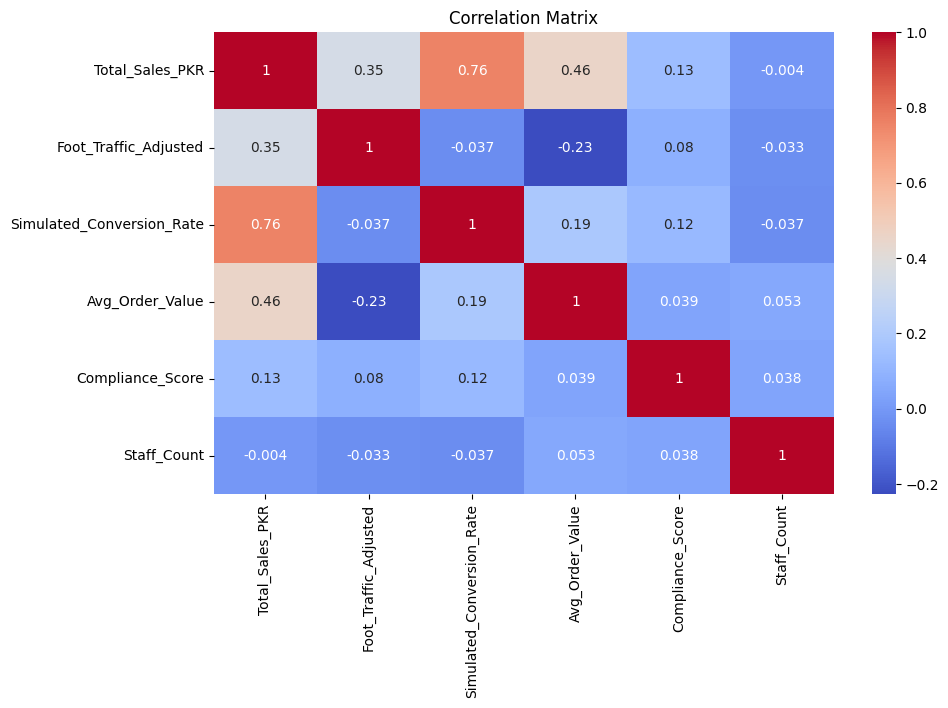

In [83]:
# 2. Light EDA before we move onto Power BI.
plt.figure(figsize=(10, 6))
sns.heatmap(df[[
    "Total_Sales_PKR",
    "Foot_Traffic_Adjusted",
    "Simulated_Conversion_Rate",
    "Avg_Order_Value",
    "Compliance_Score",
    "Staff_Count"
]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

In [86]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R² Score: 0.9398663343049707
RMSE: 51597.09344786032


In [87]:
pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lr.coef_
})

,Feature,Coefficient
0,Foot_Traffic_Adjusted,472.139748
1,Simulated_Conversion_Rate,852368.476101
2,Avg_Order_Value,97.569852
3,Compliance_Score,112.921099
4,Staff_Count,821.413827
5,Rain,1434.661393
6,Promotion_Type_Combo,41443.100972
7,Promotion_Type_Discount,75387.873975
8,Promotion_Type_Platinum Debit 40% Off,220553.871127
9,Outlet_Type_Standalone,132733.538804


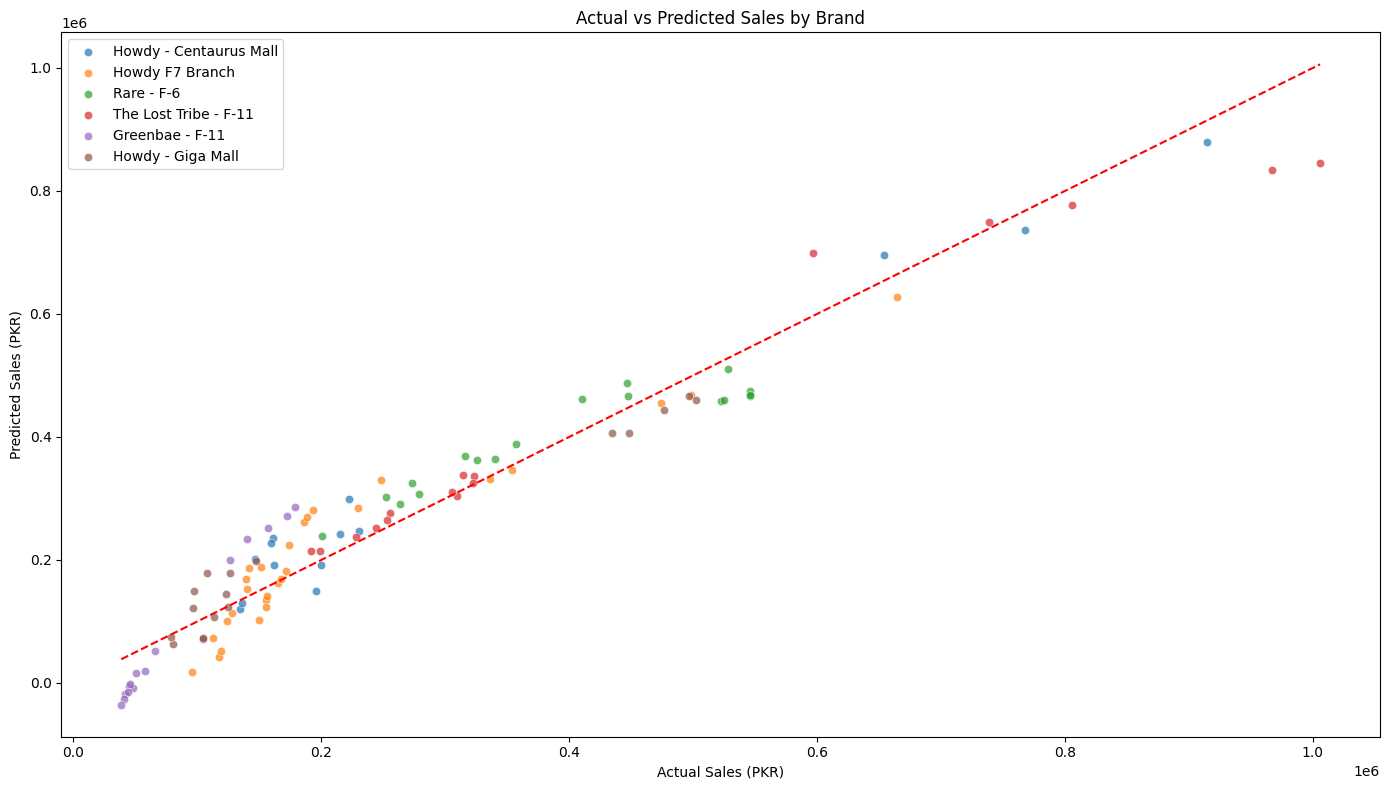

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

df_results = X_test.copy()
df_results["Actual"] = y_test
df_results["Predicted"] = y_pred
df_results["Brand"] = df.loc[df_results.index, "Brand"]  # attach brand back

brands = df_results["Brand"].unique()
plt.figure(figsize=(14, 8))
for brand in brands:
    brand_df = df_results[df_results["Brand"] == brand]
    sns.scatterplot(x=brand_df["Actual"], y=brand_df["Predicted"], label=brand, alpha=0.7)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Actual vs Predicted Sales by Brand")
plt.xlabel("Actual Sales (PKR)")
plt.ylabel("Predicted Sales (PKR)")
plt.legend()
plt.tight_layout()
plt.show()

In [89]:
# 01 - Lost Tribe's segmented regression
tlt_df = df[df["Brand"] == "The Lost Tribe - F-11"].copy()

In [90]:
features = [
    "Foot_Traffic_Adjusted",
    "Simulated_Conversion_Rate",
    "Avg_Order_Value",
    "Compliance_Score",
    "Staff_Count",
    "Rain",
    "Promotion_Type",
    "Outlet_Type"
]

target = "Total_Sales_PKR"

In [91]:
tlt_encoded = pd.get_dummies(tlt_df[features], columns=["Promotion_Type", "Outlet_Type"], drop_first=True)

X_tlt = tlt_encoded
y_tlt = tlt_df[target]

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X_tlt, y_tlt, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R² Score: 0.972550327121044
RMSE: 38205.91083900676


In [93]:
import pandas as pd

coeff_df = pd.DataFrame({
    "Feature": X_tlt.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

print(coeff_df)

                     Feature   Coefficient
1  Simulated_Conversion_Rate  1.707778e+06
0      Foot_Traffic_Adjusted  8.076699e+02
2            Avg_Order_Value  1.441737e+02
3           Compliance_Score  9.327177e-01
4                Staff_Count -1.701886e+02
5                       Rain -1.430181e+03


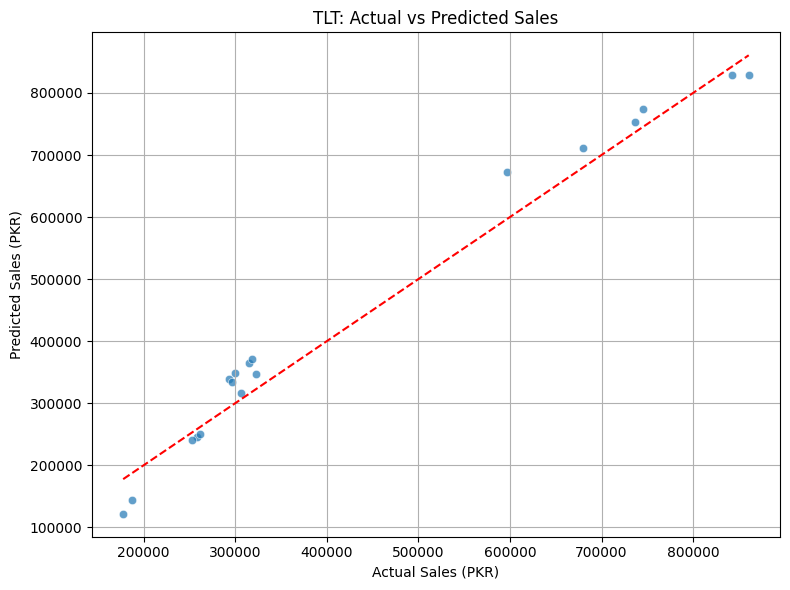

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reuse y_test and y_pred from the TLT model
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect fit line
plt.xlabel("Actual Sales (PKR)")
plt.ylabel("Predicted Sales (PKR)")
plt.title("TLT: Actual vs Predicted Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

In [95]:
# 02 - GreenBae's segmented regression
greenbae_df = df[df["Brand"] == "Greenbae - F-11"].copy()


In [96]:
features = [
    "Foot_Traffic_Adjusted",
    "Simulated_Conversion_Rate",
    "Avg_Order_Value",
    "Compliance_Score",
    "Staff_Count",
    "Rain",
    "Promotion_Type",
    "Outlet_Type"
]

target = "Total_Sales_PKR"

In [97]:
greenbae_encoded = pd.get_dummies(
    greenbae_df[features],
    columns=["Promotion_Type", "Outlet_Type"],
    drop_first=True
)

X_greenbae = greenbae_encoded
y_greenbae = greenbae_df[target]

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X_greenbae, y_greenbae, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R² Score: 0.9745430088709637
RMSE: 6987.186316291121


In [99]:
import pandas as pd

pd.DataFrame({
    "Feature": X_greenbae.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

,Feature,Coefficient
1,Simulated_Conversion_Rate,368664.996811
4,Staff_Count,363.377911
5,Rain,260.143698
0,Foot_Traffic_Adjusted,207.026330
2,Avg_Order_Value,133.856129
3,Compliance_Score,32.556219


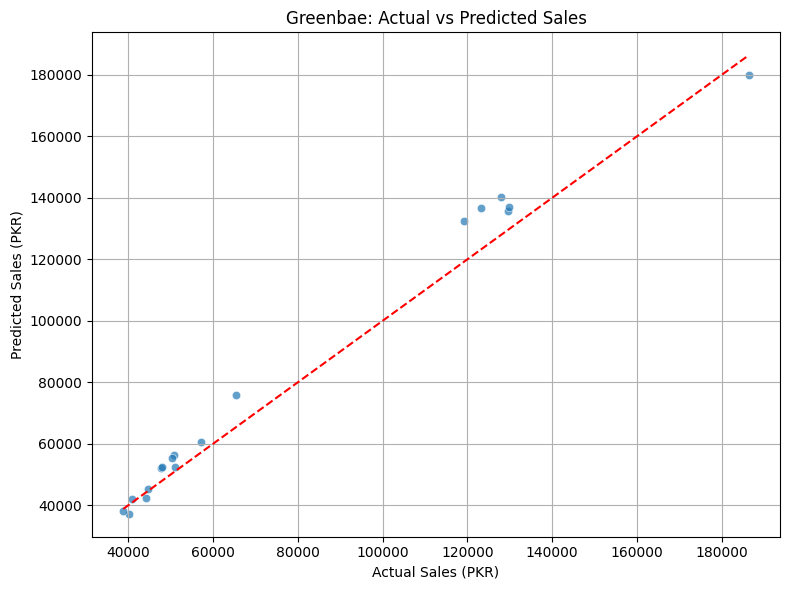

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.xlabel("Actual Sales (PKR)")
plt.ylabel("Predicted Sales (PKR)")
plt.title("Greenbae: Actual vs Predicted Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

In [101]:
# 03 - Rare's segmented regression
rare_df = df[df["Brand"] == "Rare - F-6"].copy()

In [102]:
features = [
    "Foot_Traffic_Adjusted",
    "Simulated_Conversion_Rate",
    "Avg_Order_Value",
    "Compliance_Score",
    "Staff_Count",
    "Rain",
    "Promotion_Type",
    "Outlet_Type"
]

target = "Total_Sales_PKR"

In [103]:
rare_encoded = pd.get_dummies(
    rare_df[features],
    columns=["Promotion_Type", "Outlet_Type"],
    drop_first=True
)

X_rare = rare_encoded
y_rare = rare_df[target]

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X_rare, y_rare, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R² Score: 0.9865777395955645
RMSE: 15474.884175394198


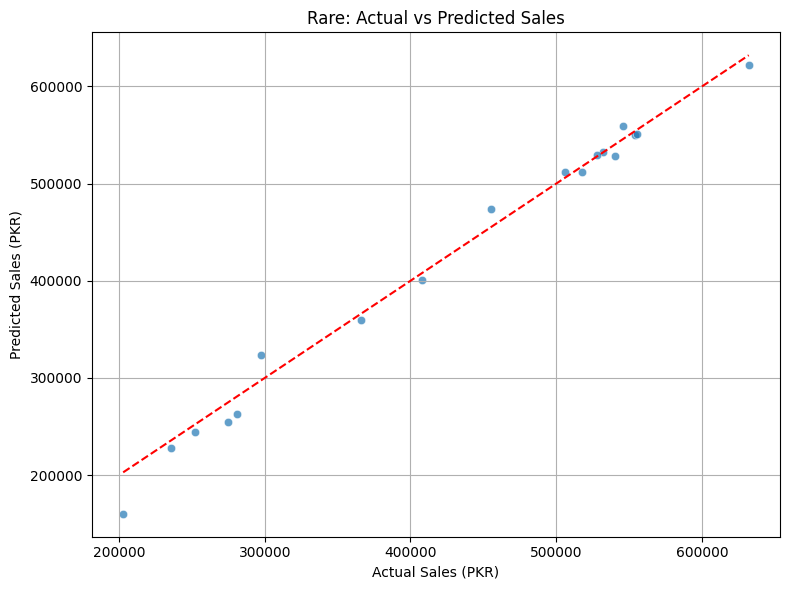

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Sales (PKR)")
plt.ylabel("Predicted Sales (PKR)")
plt.title("Rare: Actual vs Predicted Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

In [106]:
import pandas as pd

pd.DataFrame({
    "Feature": X_rare.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

,Feature,Coefficient
1,Simulated_Conversion_Rate,1.620505e+06
6,Promotion_Type_Combo,9.463655e+03
7,Promotion_Type_Discount,4.362751e+03
0,Foot_Traffic_Adjusted,6.977009e+02
2,Avg_Order_Value,2.154219e+02
3,Compliance_Score,-1.278909e+02
4,Staff_Count,-3.811840e+02
5,Rain,-1.562006e+03


In [107]:
# 04 - Howdy Centauras's segmented regression

In [108]:
howdy_c_df = df[df["Brand"] == "Howdy - Centaurus Mall"].copy()

In [109]:
features = [
    "Foot_Traffic_Adjusted",
    "Simulated_Conversion_Rate",
    "Avg_Order_Value",
    "Compliance_Score",
    "Staff_Count",
    "Rain",
    "Promotion_Type",
    "Outlet_Type"
]

target = "Total_Sales_PKR"

In [110]:
howdy_c_encoded = pd.get_dummies(
    howdy_c_df[features],
    columns=["Promotion_Type", "Outlet_Type"],
    drop_first=True
)

X_howdy_c = howdy_c_encoded
y_howdy_c = howdy_c_df[target]

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X_howdy_c, y_howdy_c, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R² Score: 0.9890566932112749
RMSE: 31388.075122525177


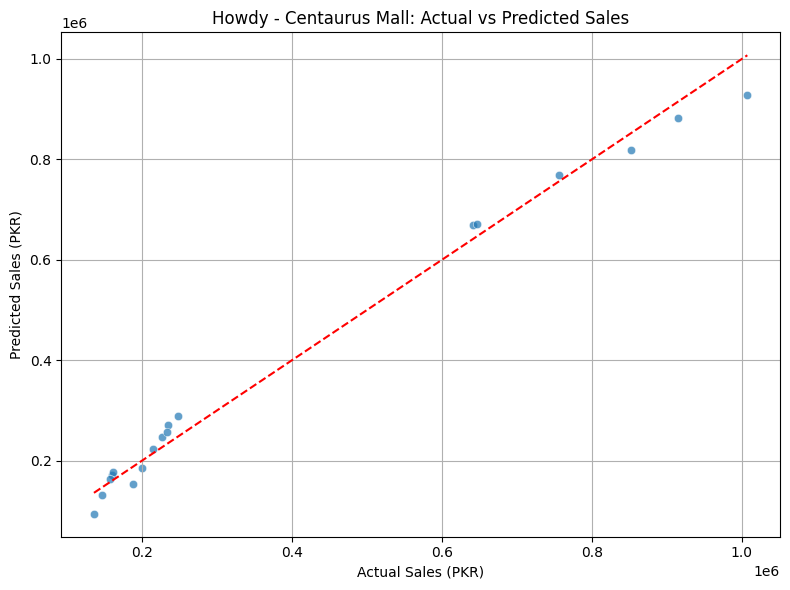

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Sales (PKR)")
plt.ylabel("Predicted Sales (PKR)")
plt.title("Howdy - Centaurus Mall: Actual vs Predicted Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

In [113]:
import pandas as pd

pd.DataFrame({
    "Feature": X_howdy_c.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

,Feature,Coefficient
1,Simulated_Conversion_Rate,2.035141e+06
0,Foot_Traffic_Adjusted,3.446474e+02
2,Avg_Order_Value,3.118783e+02
3,Compliance_Score,-6.868473e+01
4,Staff_Count,-5.774147e+02
5,Rain,-1.345946e+03


In [114]:
# 05 - Howdy F7's segmented regression

In [115]:
howdy_f7_df = df[df["Brand"] == "Howdy F7 Branch"].copy()

In [116]:
features = [
    "Foot_Traffic_Adjusted",
    "Simulated_Conversion_Rate",
    "Avg_Order_Value",
    "Compliance_Score",
    "Staff_Count",
    "Rain",
    "Promotion_Type",
    "Outlet_Type"
]

target = "Total_Sales_PKR"

In [117]:
howdy_f7_encoded = pd.get_dummies(
    howdy_f7_df[features],
    columns=["Promotion_Type", "Outlet_Type"],
    drop_first=True
)

X_howdy_f7 = howdy_f7_encoded
y_howdy_f7 = howdy_f7_df[target]

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X_howdy_f7, y_howdy_f7, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R² Score: 0.9481666164214974
RMSE: 35491.17524785954


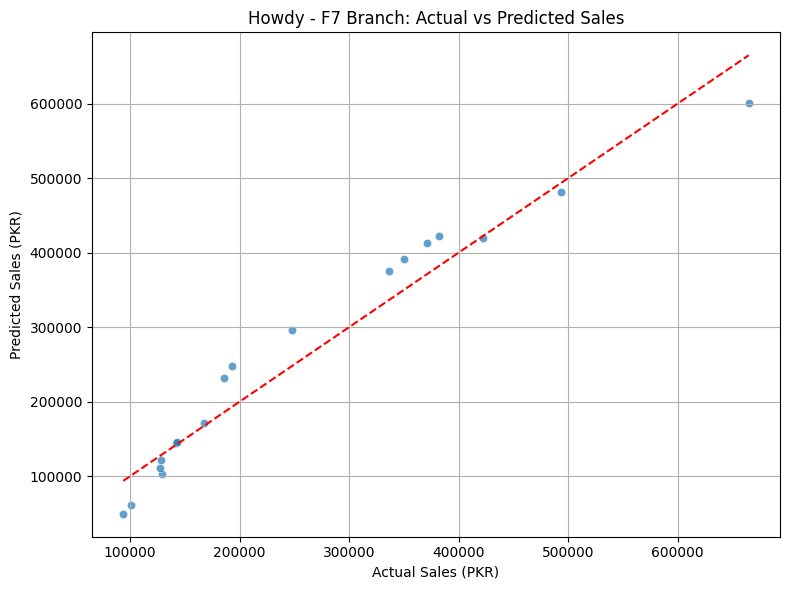

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Sales (PKR)")
plt.ylabel("Predicted Sales (PKR)")
plt.title("Howdy - F7 Branch: Actual vs Predicted Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

In [120]:
import pandas as pd

pd.DataFrame({
    "Feature": X_howdy_f7.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

,Feature,Coefficient
1,Simulated_Conversion_Rate,1.126577e+06
0,Foot_Traffic_Adjusted,3.408394e+02
4,Staff_Count,1.497176e+02
2,Avg_Order_Value,1.342557e+02
3,Compliance_Score,-4.129866e+02
5,Rain,-2.516149e+03
6,Promotion_Type_Platinum Debit 40% Off,-1.877194e+04


In [121]:
# 06 - Howdy Giga segmented regression
howdy_giga_df = df[df["Brand"] == "Howdy - Giga Mall"].copy()

In [122]:
features = [
    "Foot_Traffic_Adjusted",
    "Simulated_Conversion_Rate",
    "Avg_Order_Value",
    "Compliance_Score",
    "Staff_Count",
    "Rain",
    "Promotion_Type",
    "Outlet_Type"
]

target = "Total_Sales_PKR"

In [123]:
howdy_giga_encoded = pd.get_dummies(
    howdy_giga_df[features],
    columns=["Promotion_Type", "Outlet_Type"],
    drop_first=True
)

X_howdy_giga = howdy_giga_encoded
y_howdy_giga = howdy_giga_df[target]

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X_howdy_giga, y_howdy_giga, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R² Score: 0.9950031954417211
RMSE: 11390.94838897393


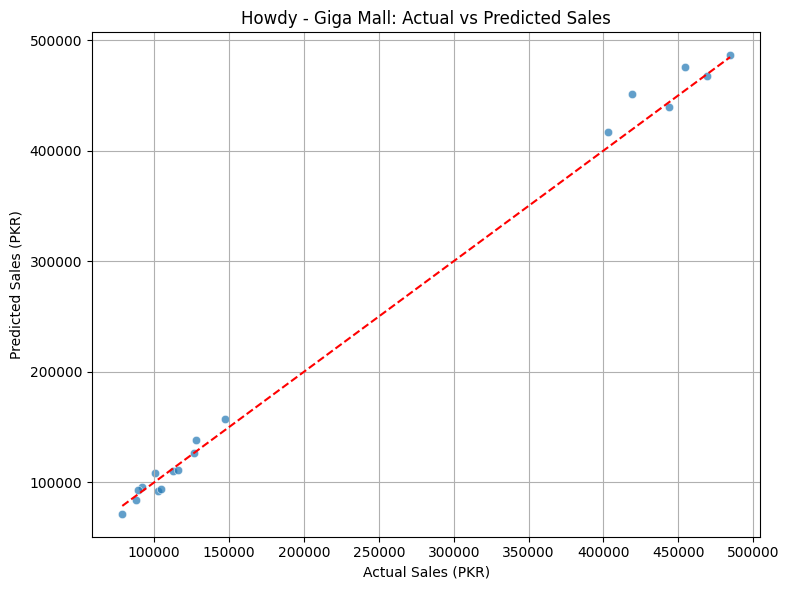

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Sales (PKR)")
plt.ylabel("Predicted Sales (PKR)")
plt.title("Howdy - Giga Mall: Actual vs Predicted Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

In [126]:
import pandas as pd

pd.DataFrame({
    "Feature": X_howdy_giga.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

,Feature,Coefficient
1,Simulated_Conversion_Rate,1.255924e+06
6,Promotion_Type_Combo,4.808364e+03
0,Foot_Traffic_Adjusted,2.021739e+02
4,Staff_Count,1.956970e+02
5,Rain,1.505525e+02
2,Avg_Order_Value,1.016358e+02
3,Compliance_Score,-2.977032e+02
7,Promotion_Type_Platinum Debit 40% Off,-1.683946e+04


In [127]:
# - Howdy F7 RandomForest
howdy_f7_df = df[df["Brand"] == "Howdy F7 Branch"].copy()


In [128]:
features = [
    "Foot_Traffic_Adjusted",
    "Simulated_Conversion_Rate",
    "Avg_Order_Value",
    "Compliance_Score",
    "Staff_Count",
    "Rain",
    "Promotion_Type",
    "Outlet_Type"
]

target = "Total_Sales_PKR"

In [129]:
f7_encoded = pd.get_dummies(
    howdy_f7_df[features],
    columns=["Promotion_Type", "Outlet_Type"],
    drop_first=True
)

X_f7 = f7_encoded
y_f7 = howdy_f7_df[target]

In [130]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_f7, y_f7, test_size=0.2, random_state=42)

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest R²:", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

Random Forest R²: 0.9920802053914844
Random Forest RMSE: 13873.06944658956


In [131]:
import pandas as pd

pd.DataFrame({
    "Feature": X_f7.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

,Feature,Importance
1,Simulated_Conversion_Rate,0.846759
0,Foot_Traffic_Adjusted,0.137598
3,Compliance_Score,0.007407
2,Avg_Order_Value,0.004927
4,Staff_Count,0.002839
5,Rain,0.000403
6,Promotion_Type_Platinum Debit 40% Off,0.000067


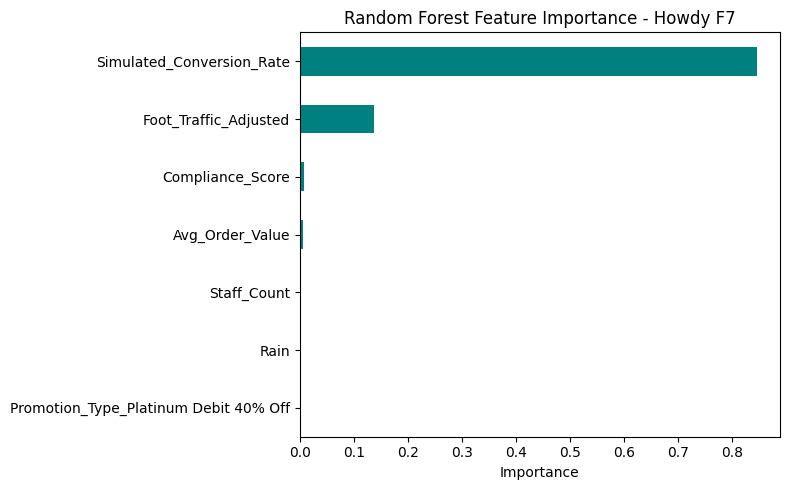

In [132]:
import pandas as pd
import matplotlib.pyplot as plt

# Feature importance chart
importances = rf_model.feature_importances_
features = X_f7.columns
forest_importances = pd.Series(importances, index=features).sort_values()

plt.figure(figsize=(8, 5))
forest_importances.plot(kind='barh', color='teal')
plt.title("Random Forest Feature Importance - Howdy F7")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

In [133]:
import shap

# Create the SHAP explainer for the trained Random Forest model
explainer = shap.TreeExplainer(rf_model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

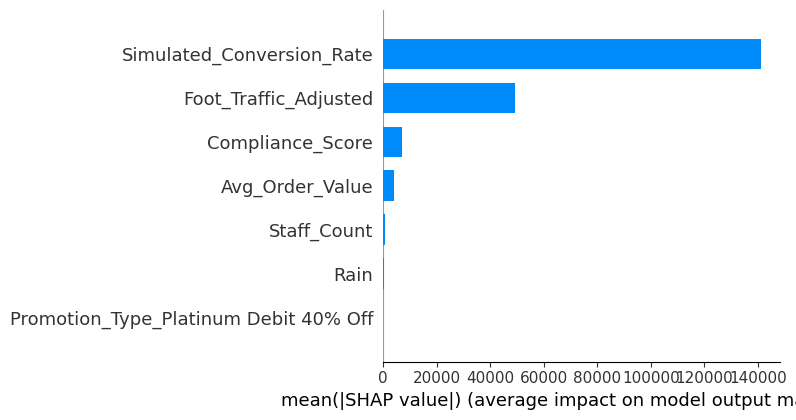

In [134]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

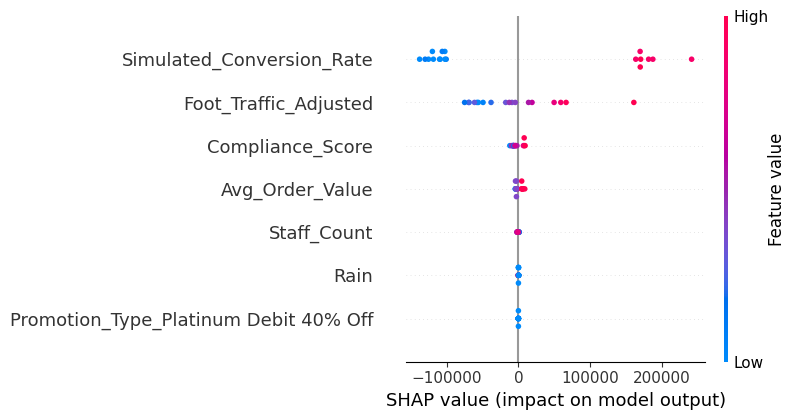

In [135]:
shap.summary_plot(shap_values, X_test)

In [136]:
# Pick a row from X_test to explain (e.g., index 5)
row_to_explain = X_test.iloc[5]

# Visual force plot
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[5], row_to_explain)

In [137]:
# 🔹 1. Train RF Model (already done)
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 🔹 2. Initialize SHAP
explainer = shap.TreeExplainer(rf_model)

# 🔹 3. Create feature template
feature_template = X_f7.iloc[0:1].copy()
feature_template = feature_template.astype(float)
feature_template[:] = 0

# 🔹 4. Paste the function RIGHT HERE ↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓
def simulate_outlet(rf_model, explainer, feature_template, *,
                    rain, staff_count, foot_traffic, conversion_rate,
                    compliance_score, avg_order_value, promo_type, outlet_type):

    import pandas as pd
    import shap

    new_data = feature_template.copy()
    new_data["Rain"] = int(rain)
    new_data["Staff_Count"] = staff_count
    new_data["Foot_Traffic_Adjusted"] = foot_traffic
    new_data["Simulated_Conversion_Rate"] = conversion_rate
    new_data["Compliance_Score"] = compliance_score
    new_data["Avg_Order_Value"] = avg_order_value

    for col in new_data.columns:
        if "Promotion_Type_" in col or "Outlet_Type_" in col:
            new_data[col] = 0

    if f"Promotion_Type_{promo_type}" in new_data.columns:
        new_data[f"Promotion_Type_{promo_type}"] = 1
    if f"Outlet_Type_{outlet_type}" in new_data.columns:
        new_data[f"Outlet_Type_{outlet_type}"] = 1

    prediction = rf_model.predict(new_data)[0]
    print(f"\n📈 Predicted Sales: {prediction:,.0f} PKR")

    shap.initjs()
    shap.force_plot(explainer.expected_value, explainer.shap_values(new_data)[0], new_data)

# 🔹 5. Then call it like this:
simulate_outlet(
    rf_model=rf_model,
    explainer=explainer,
    feature_template=feature_template,
    rain=True,
    staff_count=3,
    foot_traffic=400,
    conversion_rate=0.12,
    compliance_score=70,
    avg_order_value=1150,
    promo_type="Combo",
    outlet_type="Standalone"
)


📈 Predicted Sales: 103,323 PKR


** Simulation Scenario Grid **

In [138]:
# Filter the full dataset for Howdy F7 Branch
df_f7 = df[df["Brand"] == "Howdy F7 Branch"].copy()

# Check what promo types are available (optional)
print(df_f7["Promotion_Type"].value_counts())

Promotion_Type
Combo                     27
Platinum Debit 40% Off     4
Name: count, dtype: int64


In [139]:
# One-hot encode input features (without dropping anything)
X_f7 = pd.get_dummies(df_f7[[
    "Foot_Traffic_Adjusted",
    "Simulated_Conversion_Rate",
    "Avg_Order_Value",
    "Compliance_Score",
    "Staff_Count",
    "Rain",
    "Promotion_Type",
    "Outlet_Type"
]], drop_first=False)

# Inject any missing promo types (needed only for simulation)
for col in ["Promotion_Type_None"]:
    if col not in X_f7.columns:
        X_f7[col] = 0

In [158]:
y_f7 = df_f7["Total_Sales_PKR"]

In [159]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_f7, y_f7, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [160]:
import pandas as pd
import itertools

# Simulation values
promo_types = ["Promotion_Type_Combo", "Promotion_Type_Platinum Debit 40% Off", "Promotion_Type_None"]
rain_options = [True, False]
staff_counts = [2, 3, 4]
foot_traffic_values = [300, 400, 500]
conversion_rates = [0.10, 0.12, 0.14]

# Build the grid
scenarios = list(itertools.product(promo_types, rain_options, staff_counts, foot_traffic_values, conversion_rates))
grid_df = pd.DataFrame(scenarios, columns=[
    "Promo_Type", "Rain", "Staff_Count", "Foot_Traffic", "Conversion_Rate"
])

grid_df["Compliance_Score"] = 70
grid_df["Avg_Order_Value"] = 1150
grid_df["Outlet_Type"] = "Standalone"

In [161]:
predictions = []

for _, row in grid_df.iterrows():
    temp_input = X_f7.iloc[0:1].copy()
    temp_input = temp_input.astype(float)
    temp_input[:] = 0

    # Assign inputs
    temp_input["Rain"] = int(row["Rain"])
    temp_input["Staff_Count"] = row["Staff_Count"]
    temp_input["Foot_Traffic_Adjusted"] = row["Foot_Traffic"]
    temp_input["Simulated_Conversion_Rate"] = row["Conversion_Rate"]
    temp_input["Compliance_Score"] = row["Compliance_Score"]
    temp_input["Avg_Order_Value"] = row["Avg_Order_Value"]

    # Reset all promo and outlet encodings
    for col in temp_input.columns:
        if "Promotion_Type_" in col or "Outlet_Type_" in col:
            temp_input[col] = 0

    # Set correct promo/outlet type
    promo_col = row["Promo_Type"]
    outlet_col = f"Outlet_Type_{row['Outlet_Type']}"

    if promo_col in temp_input.columns:
        temp_input[promo_col] = 1
    if outlet_col in temp_input.columns:
        temp_input[outlet_col] = 1

    # Predict
    pred = rf_model.predict(temp_input)[0]
    predictions.append(round(pred))

# Store predictions
grid_df["Predicted_Sales"] = predictions

In [162]:
def classify_risk(sales):
    if sales < 100000:
        return "🔴 High Risk"
    elif sales < 150000:
        return "🟡 Moderate"
    else:
        return "🟢 Low Risk"

grid_df["Risk_Flag"] = grid_df["Predicted_Sales"].apply(classify_risk)

In [175]:
# Sort and display top
grid_df.groupby("Promo_Type")["Predicted_Sales"].mean().sort_values(ascending=False)
display(grid_df_sorted.head(10))

,Promo_Type,Rain,Staff_Count,Foot_Traffic,Conversion_Rate,Compliance_Score,Avg_Order_Value,Outlet_Type,Predicted_Sales,Risk_Flag
0,Promotion_Type_Combo,True,2,300,0.10,70,1150,Standalone,122274,🟡 Moderate
1,Promotion_Type_Combo,True,2,300,0.12,70,1150,Standalone,122274,🟡 Moderate
2,Promotion_Type_Combo,True,2,300,0.14,70,1150,Standalone,122274,🟡 Moderate
3,Promotion_Type_Combo,True,2,400,0.10,70,1150,Standalone,122274,🟡 Moderate
4,Promotion_Type_Combo,True,2,400,0.12,70,1150,Standalone,122274,🟡 Moderate
5,Promotion_Type_Combo,True,2,400,0.14,70,1150,Standalone,122274,🟡 Moderate
6,Promotion_Type_Combo,True,2,500,0.10,70,1150,Standalone,122274,🟡 Moderate
7,Promotion_Type_Combo,True,2,500,0.12,70,1150,Standalone,122274,🟡 Moderate
8,Promotion_Type_Combo,True,2,500,0.14,70,1150,Standalone,122274,🟡 Moderate
9,Promotion_Type_Combo,True,3,300,0.10,70,1150,Standalone,122274,🟡 Moderate


<ipython-input-164-15fa38b9cb09>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_by_promo = grid_df.groupby("Promo_Type").apply(lambda d: d.sort_values("Predicted_Sales", ascending=False).head(1)).reset_index(drop=True)


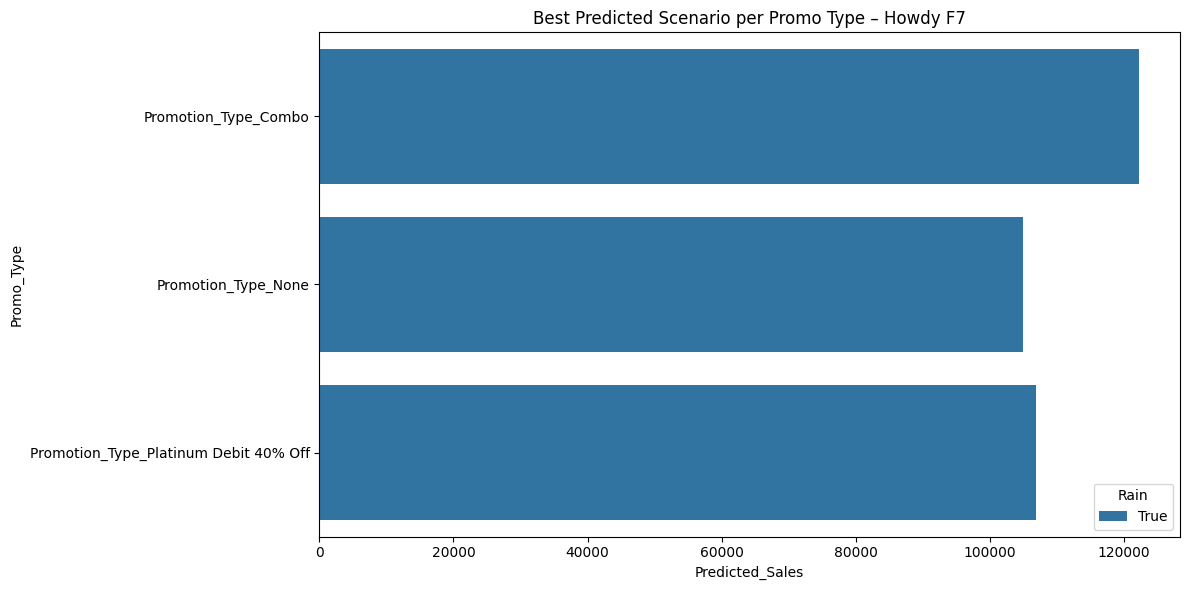

In [164]:
top_by_promo = grid_df.groupby("Promo_Type").apply(lambda d: d.sort_values("Predicted_Sales", ascending=False).head(1)).reset_index(drop=True)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_by_promo, x="Predicted_Sales", y="Promo_Type", hue="Rain")
plt.title("Best Predicted Scenario per Promo Type – Howdy F7")
plt.tight_layout()
plt.show()

In [165]:
grid_df.groupby("Promo_Type").apply(lambda df: df.sort_values("Predicted_Sales", ascending=False).head(1))[[
    "Promo_Type", "Rain", "Staff_Count", "Foot_Traffic", "Conversion_Rate", "Predicted_Sales", "Risk_Flag"
]]

<ipython-input-165-46b7e8163864>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grid_df.groupby("Promo_Type").apply(lambda df: df.sort_values("Predicted_Sales", ascending=False).head(1))[[


,,Promo_Type,Rain,Staff_Count,Foot_Traffic,Conversion_Rate,Predicted_Sales,Risk_Flag
Promo_Type,,,,,,,,
Promotion_Type_Combo,0,Promotion_Type_Combo,True,2,300,0.1,122274,🟡 Moderate
Promotion_Type_None,108,Promotion_Type_None,True,2,300,0.1,104985,🟡 Moderate
Promotion_Type_Platinum Debit 40% Off,54,Promotion_Type_Platinum Debit 40% Off,True,2,300,0.1,106900,🟡 Moderate


In [166]:
df_f7["Date"] = pd.to_datetime(df_f7["Date"])
df_f7 = df_f7.sort_values("Date")

In [167]:
# Lagged features (yesterday's data)
df_f7["Conversion_Rate_Lag1"] = df_f7["Simulated_Conversion_Rate"].shift(1)

# Rolling average of past 3 days
df_f7["Conversion_Rate_MA3"] = df_f7["Simulated_Conversion_Rate"].rolling(window=3).mean()

# (Optional) Lagged traffic
df_f7["Foot_Traffic_Lag1"] = df_f7["Foot_Traffic_Adjusted"].shift(1)

In [168]:
df_f7 = df_f7.dropna(subset=["Conversion_Rate_Lag1", "Conversion_Rate_MA3", "Foot_Traffic_Lag1"])

In [169]:
# One-hot encode with time-aware inputs
X_f7 = pd.get_dummies(df_f7[[
    "Foot_Traffic_Adjusted",
    "Foot_Traffic_Lag1",
    "Simulated_Conversion_Rate",
    "Conversion_Rate_Lag1",
    "Conversion_Rate_MA3",
    "Avg_Order_Value",
    "Compliance_Score",
    "Staff_Count",
    "Rain",
    "Promotion_Type",
    "Outlet_Type"
]], drop_first=False)

# Inject any missing columns to match model input structure
for col in ["Promotion_Type_None", "Promotion_Type_Combo", "Promotion_Type_Platinum Debit 40% Off"]:
    if col not in X_f7.columns:
        X_f7[col] = 0

y_f7 = df_f7["Total_Sales_PKR"]

In [170]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X_f7, y_f7, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [171]:
import sklearn.metrics as skm

In [176]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

y_pred = rf_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("📊 R² Score:", round(r2, 4))
print("📉 RMSE:", round(rmse, 2))

📊 R² Score: 0.9735
📉 RMSE: 17457.21


Time Aware Model

In [188]:
import pandas as pd
import itertools

# Define simulation ranges
promo_types = ["Promotion_Type_Combo", "Promotion_Type_Platinum Debit 40% Off", "Promotion_Type_None"]
rain_options = [True, False]
staff_counts = [2, 3, 4]
foot_traffic_values = [300, 400, 500]
conversion_rates = [0.10, 0.12, 0.14]
conversion_lag = [0.10, 0.11, 0.13]
conversion_ma3 = [0.11, 0.12, 0.13]
foot_traffic_lag = [250, 300, 400]

# Create scenario combinations
scenarios = list(itertools.product(
    promo_types, rain_options, staff_counts, foot_traffic_values,
    conversion_rates, conversion_lag, conversion_ma3, foot_traffic_lag
))

# Build DataFrame
grid_df = pd.DataFrame(scenarios, columns=[
    "Promo_Type", "Rain", "Staff_Count", "Foot_Traffic",
    "Conversion_Rate", "Lagged_Conversion", "MA3_Conversion", "Foot_Traffic_Lag"
])

# Add constants
grid_df["Compliance_Score"] = 70
grid_df["Avg_Order_Value"] = 1150
grid_df["Outlet_Type"] = "Standalone"

In [189]:
predictions = []

for _, row in grid_df.iterrows():
    temp_input = X_f7.iloc[0:1].copy()
    temp_input = temp_input.astype(float)
    temp_input[:] = 0

    temp_input["Rain"] = int(row["Rain"])
    temp_input["Staff_Count"] = row["Staff_Count"]
    temp_input["Foot_Traffic_Adjusted"] = row["Foot_Traffic"]
    temp_input["Foot_Traffic_Lag1"] = row["Foot_Traffic_Lag"]
    temp_input["Simulated_Conversion_Rate"] = row["Conversion_Rate"]
    temp_input["Conversion_Rate_Lag1"] = row["Lagged_Conversion"]
    temp_input["Conversion_Rate_MA3"] = row["MA3_Conversion"]
    temp_input["Compliance_Score"] = row["Compliance_Score"]
    temp_input["Avg_Order_Value"] = row["Avg_Order_Value"]

    # Reset all dummies
    for col in temp_input.columns:
        if "Promotion_Type_" in col or "Outlet_Type_" in col:
            temp_input[col] = 0

    # Encode promo and outlet
    promo_col = row["Promo_Type"]
    outlet_col = f"Outlet_Type_{row['Outlet_Type']}"

    if promo_col in temp_input.columns:
        temp_input[promo_col] = 1
    if outlet_col in temp_input.columns:
        temp_input[outlet_col] = 1

    # Predict
    pred = rf_model.predict(temp_input)[0]
    predictions.append(round(pred))

# Store predictions
grid_df["Predicted_Sales"] = predictions

In [190]:
def classify_risk(sales):
    if sales < 100000:
        return "🔴 High Risk"
    elif sales < 150000:
        return "🟡 Moderate"
    else:
        return "🟢 Low Risk"

grid_df["Risk_Flag"] = grid_df["Predicted_Sales"].apply(classify_risk)

<ipython-input-191-7d6cc059d698>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top = grid_df_sorted.groupby("Promo_Type").apply(lambda d: d.sort_values("Predicted_Sales", ascending=False).head(1)).reset_index(drop=True)


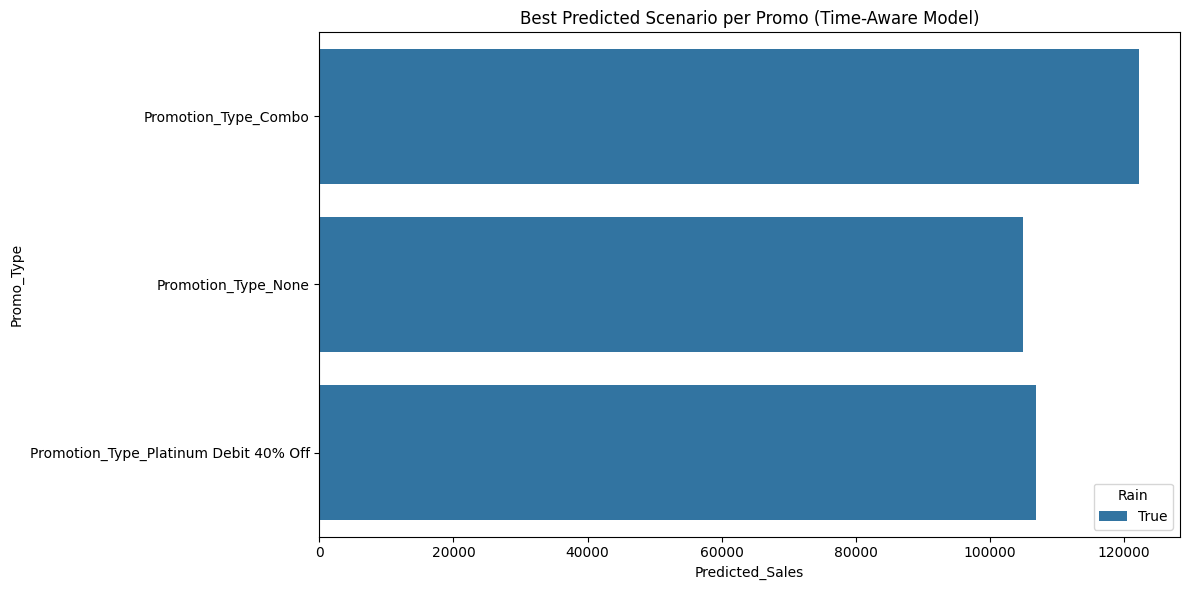

In [191]:
import seaborn as sns
import matplotlib.pyplot as plt

top = grid_df_sorted.groupby("Promo_Type").apply(lambda d: d.sort_values("Predicted_Sales", ascending=False).head(1)).reset_index(drop=True)

plt.figure(figsize=(12, 6))
sns.barplot(data=top, x="Predicted_Sales", y="Promo_Type", hue="Rain")
plt.title("Best Predicted Scenario per Promo (Time-Aware Model)")
plt.tight_layout()
plt.show()

<ipython-input-194-0a2907ba744a>:8: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-194-0a2907ba744a>:8: UserWarning: Glyph 128993 (\N{LARGE YELLOW CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-194-0a2907ba744a>:8: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128993 (\N{LARGE YELLOW CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_fi

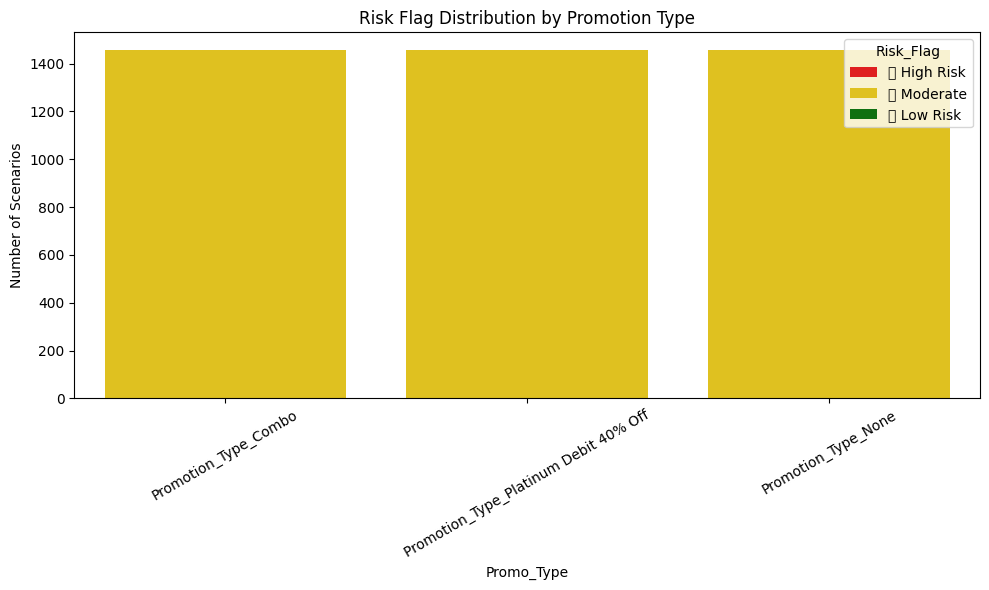

In [194]:
plt.figure(figsize=(10, 6))
sns.countplot(data=grid_df, x="Promo_Type", hue="Risk_Flag", order=grid_df["Promo_Type"].unique(),
              hue_order=["🔴 High Risk", "🟡 Moderate", "🟢 Low Risk"],
              palette=["red", "gold", "green"])
plt.title("Risk Flag Distribution by Promotion Type")
plt.ylabel("Number of Scenarios")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

**Sensitivity Analysis**

In [195]:
# Define a neutral base input row (as a reference point)
base_input = X_f7.iloc[0:1].copy()
base_input[:] = 0  # Reset all values

# Set constant values
base_input["Foot_Traffic_Adjusted"] = 400
base_input["Foot_Traffic_Lag1"] = 350
base_input["Simulated_Conversion_Rate"] = 0.12
base_input["Conversion_Rate_Lag1"] = 0.10
base_input["Conversion_Rate_MA3"] = 0.11
base_input["Avg_Order_Value"] = 1150
base_input["Compliance_Score"] = 70
base_input["Staff_Count"] = 3
base_input["Rain"] = 0
base_input["Promotion_Type_Combo"] = 1
base_input["Outlet_Type_Standalone"] = 1

<ipython-input-195-8c3d64cf613d>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  base_input[:] = 0  # Reset all values
<ipython-input-195-8c3d64cf613d>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  base_input[:] = 0  # Reset all values
<ipython-input-195-8c3d64cf613d>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  base_input[:] = 0  # Reset all values


** Sensitivity to Foot Traffic**

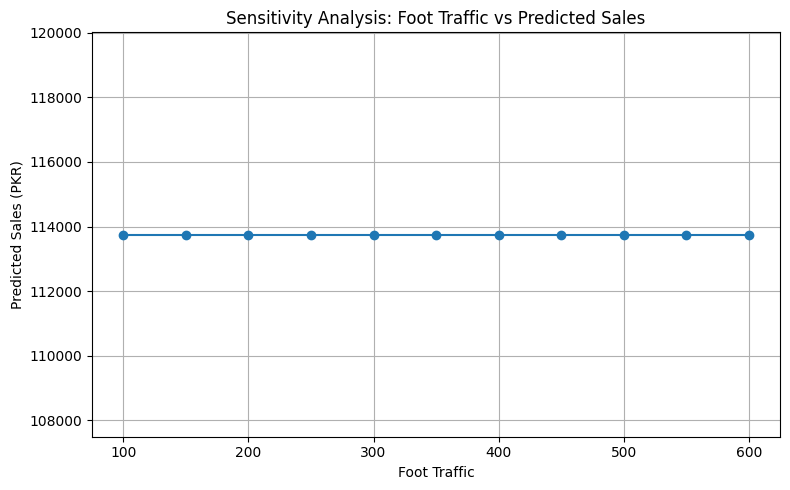

In [196]:
import numpy as np
import matplotlib.pyplot as plt

traffic_range = np.arange(100, 650, 50)
sales_predictions = []

for ft in traffic_range:
    temp = base_input.copy()
    temp["Foot_Traffic_Adjusted"] = ft
    pred = rf_model.predict(temp)[0]
    sales_predictions.append(pred)

# Plot
plt.figure(figsize=(8,5))
plt.plot(traffic_range, sales_predictions, marker='o')
plt.title("Sensitivity Analysis: Foot Traffic vs Predicted Sales")
plt.xlabel("Foot Traffic")
plt.ylabel("Predicted Sales (PKR)")
plt.grid(True)
plt.tight_layout()
plt.show()

**Conversion Rate**


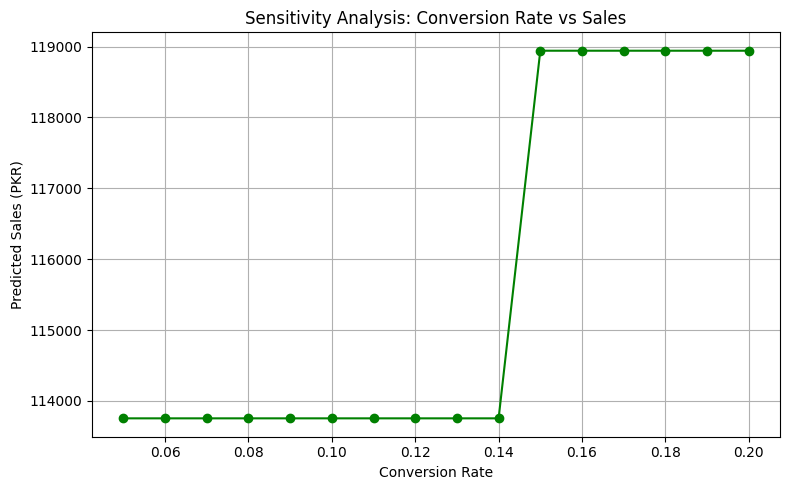

In [197]:
conv_range = np.round(np.arange(0.05, 0.21, 0.01), 2)
conv_sales = []

for cr in conv_range:
    temp = base_input.copy()
    temp["Simulated_Conversion_Rate"] = cr
    pred = rf_model.predict(temp)[0]
    conv_sales.append(pred)

plt.figure(figsize=(8,5))
plt.plot(conv_range, conv_sales, marker='o', color="green")
plt.title("Sensitivity Analysis: Conversion Rate vs Sales")
plt.xlabel("Conversion Rate")
plt.ylabel("Predicted Sales (PKR)")
plt.grid(True)
plt.tight_layout()
plt.show()

** Staff Count**

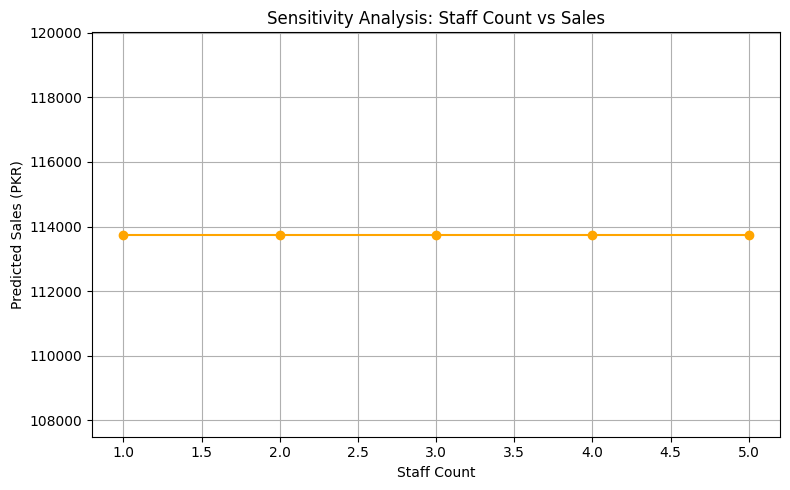

In [198]:
staff_range = range(1, 6)
staff_sales = []

for sc in staff_range:
    temp = base_input.copy()
    temp["Staff_Count"] = sc
    pred = rf_model.predict(temp)[0]
    staff_sales.append(pred)

plt.figure(figsize=(8,5))
plt.plot(staff_range, staff_sales, marker='o', color="orange")
plt.title("Sensitivity Analysis: Staff Count vs Sales")
plt.xlabel("Staff Count")
plt.ylabel("Predicted Sales (PKR)")
plt.grid(True)
plt.tight_layout()
plt.show()

** Rain vs No Rain**

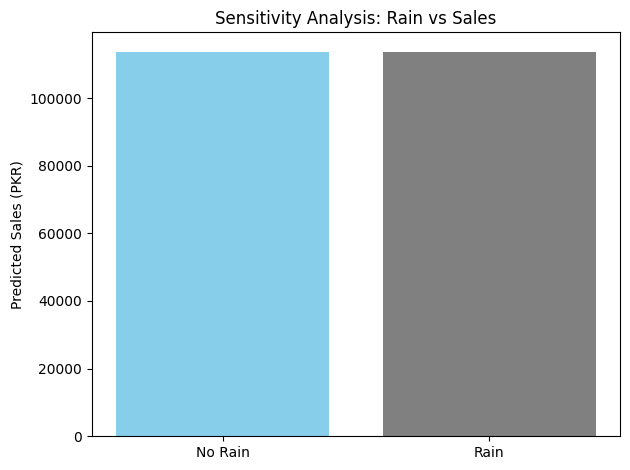

In [199]:
rain_sales = []

for rain in [0, 1]:
    temp = base_input.copy()
    temp["Rain"] = rain
    pred = rf_model.predict(temp)[0]
    rain_sales.append(pred)

plt.bar(["No Rain", "Rain"], rain_sales, color=["skyblue", "gray"])
plt.title("Sensitivity Analysis: Rain vs Sales")
plt.ylabel("Predicted Sales (PKR)")
plt.tight_layout()
plt.show()

In [204]:
def recommend(row):
    # High-performance case
    if row["Predicted_Sales"] > 118000:
        return "✅ Maintain Strategy"

    # Rain scenario with low sales
    elif row["Rain"] == 1 and row["Predicted_Sales"] < 110000:
        return "💡 Use Debit 40% Promo in Rain"

    # High staff, low output
    elif row["Staff_Count"] >= 4 and row["Predicted_Sales"] < 115000:
        return "📉 Reduce Staff – Inefficient Load"

    # Low conversion under Combo
    elif row["Promo_Type"] == "Promotion_Type_Combo" and row["Conversion_Rate"] < 0.12:
        return "💡 Switch Promo – Combo Underperforming"

    # Default case
    else:
        return "📌 Monitor – No Clear Action"

In [205]:
# Re-merge or pull original promo info into grid_df
if "Promo_Type" not in grid_df.columns:
    grid_df["Promo_Type"] = [row["Promo_Type"] for _, row in grid_df.iterrows()]

In [206]:
grid_df["Recommendation"] = grid_df.apply(recommend, axis=1)

In [207]:
display(grid_df[[
    "Promo_Type", "Rain", "Staff_Count", "Foot_Traffic",
    "Conversion_Rate", "Predicted_Sales", "Risk_Flag", "Recommendation"
]].sort_values(by="Predicted_Sales", ascending=True).head(10))

,Promo_Type,Rain,Staff_Count,Foot_Traffic,Conversion_Rate,Predicted_Sales,Risk_Flag,Recommendation
4372,Promotion_Type_None,False,4,500,0.14,100760,🟡 Moderate,📉 Reduce Staff – Inefficient Load
2913,Promotion_Type_Platinum Debit 40% Off,False,4,500,0.14,100760,🟡 Moderate,📉 Reduce Staff – Inefficient Load
2912,Promotion_Type_Platinum Debit 40% Off,False,4,500,0.14,100760,🟡 Moderate,📉 Reduce Staff – Inefficient Load
2911,Promotion_Type_Platinum Debit 40% Off,False,4,500,0.14,100760,🟡 Moderate,📉 Reduce Staff – Inefficient Load
2910,Promotion_Type_Platinum Debit 40% Off,False,4,500,0.14,100760,🟡 Moderate,📉 Reduce Staff – Inefficient Load
2909,Promotion_Type_Platinum Debit 40% Off,False,4,500,0.14,100760,🟡 Moderate,📉 Reduce Staff – Inefficient Load
2908,Promotion_Type_Platinum Debit 40% Off,False,4,500,0.14,100760,🟡 Moderate,📉 Reduce Staff – Inefficient Load
2907,Promotion_Type_Platinum Debit 40% Off,False,4,500,0.14,100760,🟡 Moderate,📉 Reduce Staff – Inefficient Load
2906,Promotion_Type_Platinum Debit 40% Off,False,4,500,0.14,100760,🟡 Moderate,📉 Reduce Staff – Inefficient Load
2905,Promotion_Type_Platinum Debit 40% Off,False,4,500,0.14,100760,🟡 Moderate,📉 Reduce Staff – Inefficient Load


In [208]:
grid_df.sample(10)[[
    "Promo_Type", "Rain", "Staff_Count", "Foot_Traffic",
    "Conversion_Rate", "Predicted_Sales", "Risk_Flag", "Recommendation"
]]

,Promo_Type,Rain,Staff_Count,Foot_Traffic,Conversion_Rate,Predicted_Sales,Risk_Flag,Recommendation
178,Promotion_Type_Combo,True,2,500,0.10,113753,🟡 Moderate,💡 Switch Promo – Combo Underperforming
4072,Promotion_Type_None,False,3,500,0.10,100760,🟡 Moderate,📌 Monitor – No Clear Action
4279,Promotion_Type_None,False,4,400,0.14,100760,🟡 Moderate,📉 Reduce Staff – Inefficient Load
2109,Promotion_Type_Platinum Debit 40% Off,True,4,500,0.10,100760,🟡 Moderate,💡 Use Debit 40% Promo in Rain
529,Promotion_Type_Combo,True,4,300,0.12,113753,🟡 Moderate,📉 Reduce Staff – Inefficient Load
3507,Promotion_Type_None,True,4,400,0.10,100760,🟡 Moderate,💡 Use Debit 40% Promo in Rain
3218,Promotion_Type_None,True,3,300,0.14,100760,🟡 Moderate,💡 Use Debit 40% Promo in Rain
3918,Promotion_Type_None,False,3,300,0.12,100760,🟡 Moderate,📌 Monitor – No Clear Action
2083,Promotion_Type_Platinum Debit 40% Off,True,4,400,0.14,100760,🟡 Moderate,💡 Use Debit 40% Promo in Rain
2565,Promotion_Type_Platinum Debit 40% Off,False,3,400,0.14,100760,🟡 Moderate,📌 Monitor – No Clear Action
